### Types of Model Fit
* Underfitting: 
   * Model has a high bias- not even good/enough prediction on training data
* Ovderfitting: 
   * Model has a high variance- predicts very well on the training data but performs poorly on the test data, can’t generalize to things it hasn’t seen
* Good Fit: 
   * Model has a low variance- generalizes well on the test data

few_50_samples_X: (50, 1)
few_50_samples with noise_y: (50,)


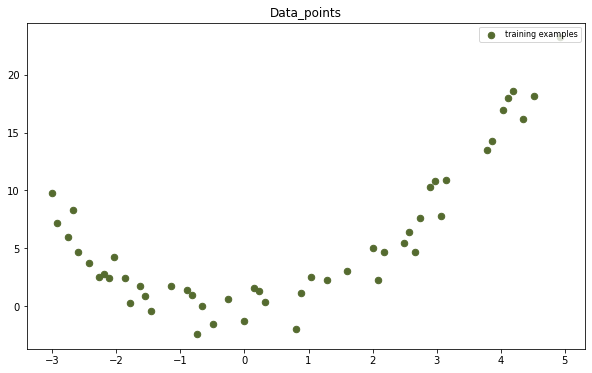

In [7]:
#import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import rc #runtime configuration (rc) containing the default styles for every plot element you create
from pylab import rcParams
from sklearn.pipeline import make_pipeline


rcParams['figure.figsize'] = 10, 6

data = np.linspace(-3, 5, 100)

np.random.shuffle(data) #modify a sequence in-place by shuffling its contents
X = np.sort(data[:50])
noise = [(-3 + np.random.random()*5) for i in range(len(X))]
y = X * X + noise

X = np.expand_dims(X, axis=1)

x_plot = np.linspace(-3, 5, 100)
y_test = np.expand_dims(x_plot, axis=1)

print('few_50_samples_X:',X.shape)
print('few_50_samples with noise_y:',y.shape)


colors = ['red', 'royalblue', 'darkcyan']
lw = 3

#plot data_points
plt.scatter(X, y, color='darkolivegreen', s=42, marker='o', label="training examples")
plt.legend(loc='upper right', prop={'size': 8})
plt.title("Data_points")
plt.show()

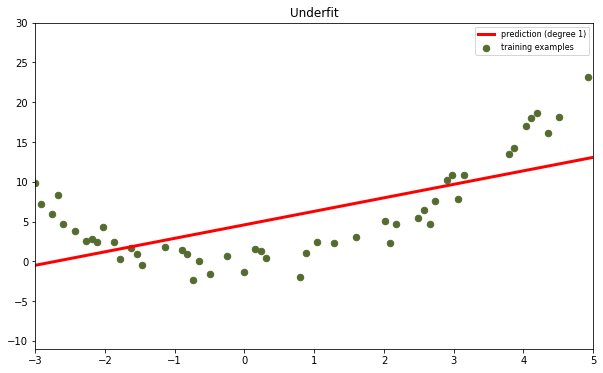

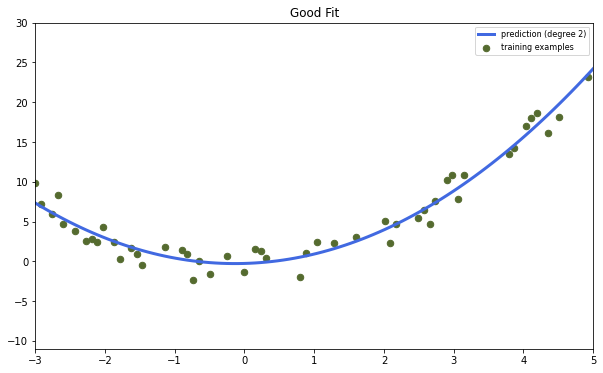

/home/sonal/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.31116e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


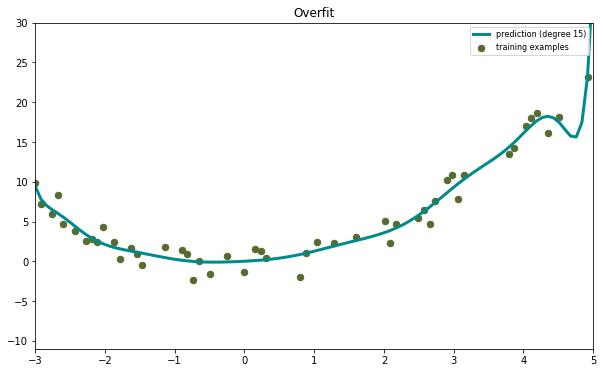

In [8]:
x_train=X
y_train=y
fit = ["Underfit", "Good Fit", "Overfit"]
for count, degree in enumerate([1, 2, 15]):
    plt.xlim([-3, 5])
    plt.ylim([-11, 30])
    plt.scatter(x_train, y_train, color='darkolivegreen', s=42, marker='o', label="training examples")
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, y_train)
    y_pred = model.predict(y_test)
    plt.plot(x_plot, y_pred, color=colors[count], linewidth=lw,
             label=f'prediction (degree {degree})')
    plt.legend(loc='upper right', prop={'size': 8})
    plt.title(fit[count])
    plt.show()

### Take-home-points:
* Fixing Underfitting and Overfitting Models
     * Data has no predictive power
     * Model is too simple to make good predictions
     * Data brings the difficult/multi dimensionality
     * Model is too complex and data has clear relationship
        * removing layers or reducing the number of elements in the hidden layers
        * Apply regularization, which comes down to adding a cost to the loss function for large weights
        * Use Dropout layers, which will randomly remove certain features by setting them to zero.